In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score 
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data and getting the information about data

bs=pd.read_csv("day.csv")
bs.head()
bs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [3]:
#converting dteday object to datetime

bs["dteday"]=pd.to_datetime(bs["dteday"])

In [4]:
#Checking info and top 5 items of the data
bs.info()
bs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Dropping the columns casual and registered as we will be taking cnt as target variable
bs.drop(columns=["casual","registered","instant","dteday",],inplace=True)
bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


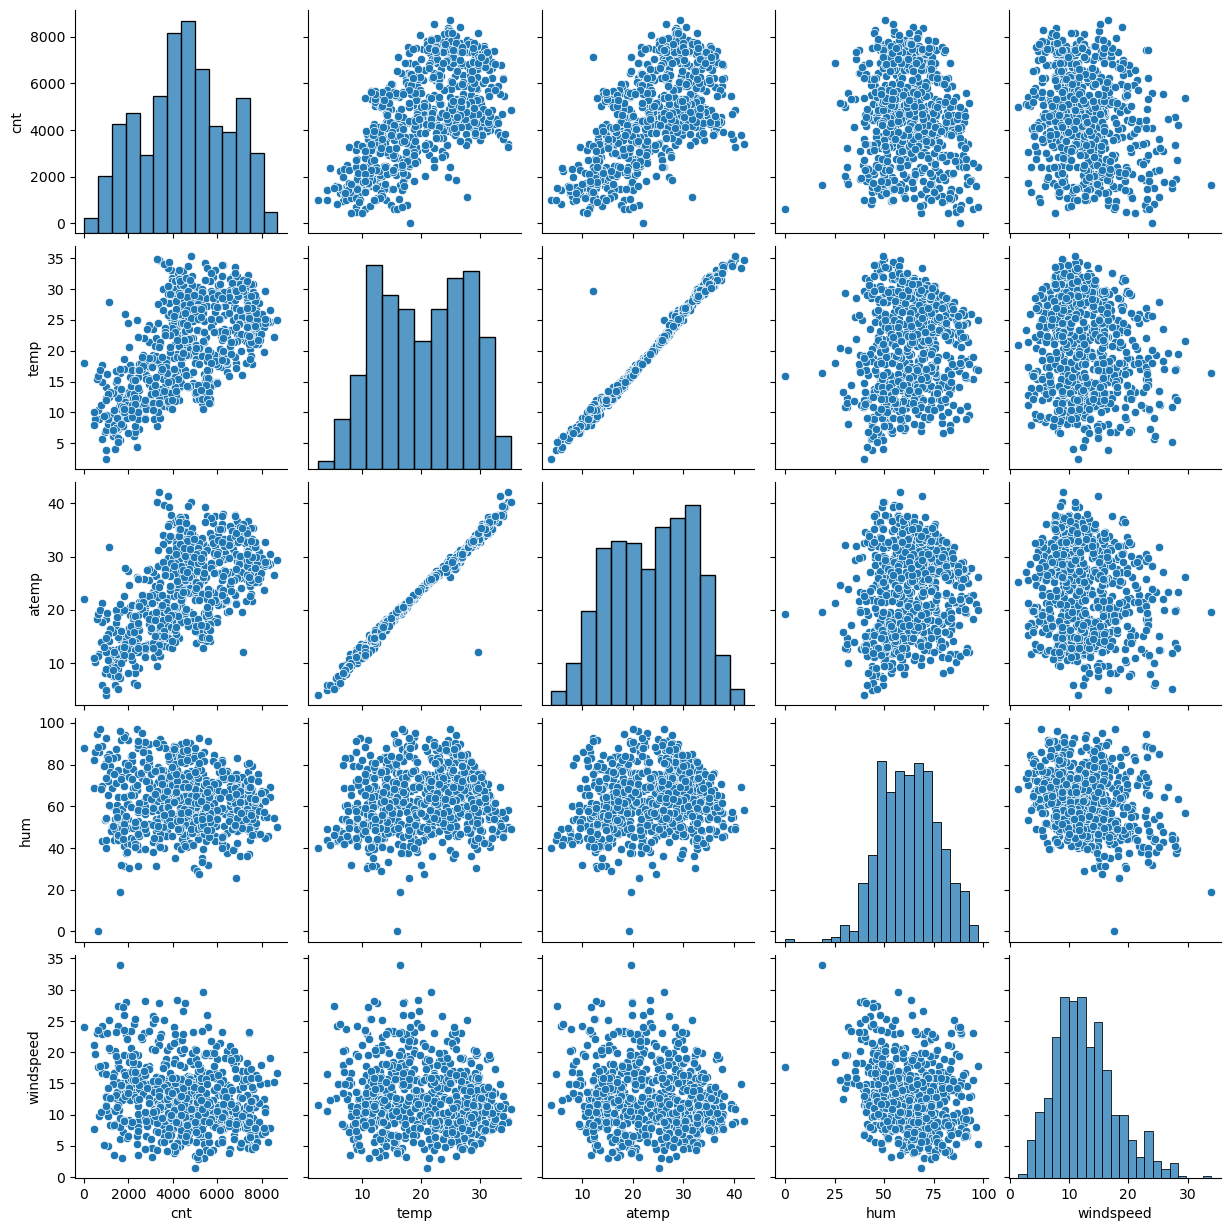

In [6]:
#Plotting scatterplot to undersstand the data impact and doing the analysis
continous_cols = ["cnt","temp","atemp","hum","windspeed"]
sns.pairplot(bs[continous_cols])
plt.show()

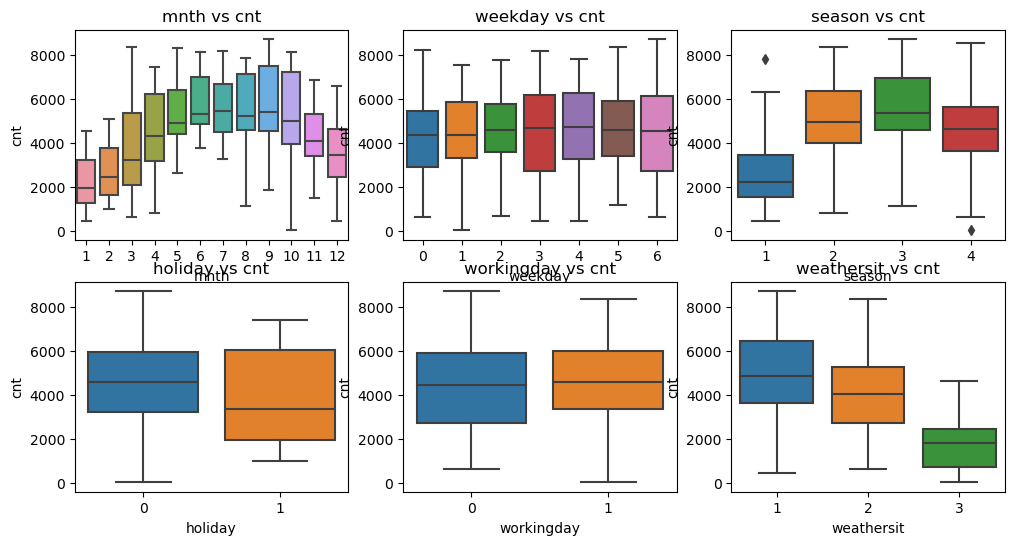

In [7]:
#Plotting boxplot to understand the relationship and how one parameter is impacting other
Categorical_cols = ["cnt","mnth","weekday","season","holiday","workingday","weathersit"]
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
sns.boxplot(x="mnth",y="cnt",data=bs)
plt.title('mnth vs cnt')

plt.subplot(2,3,2)
sns.boxplot(x="weekday",y="cnt",data=bs)
plt.title('weekday vs cnt')


plt.subplot(2,3,3)
sns.boxplot(x="season",y="cnt",data=bs)
plt.title('season vs cnt')

plt.subplot(2,3,4)
sns.boxplot(x="holiday",y="cnt",data=bs)
plt.title('holiday vs cnt')

plt.subplot(2,3,5)
sns.boxplot(x="workingday",y="cnt",data=bs)
plt.title('workingday vs cnt')

plt.subplot(2,3,6)
sns.boxplot(x="weathersit",y="cnt",data=bs)
plt.title('weathersit vs cnt')

plt.show()

## We can draw following insights from the plots

1. Season: 3:fall has highest demand for rental bikes
2. Demand for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.Weekday and weekends demand is almost same.
6. The clear weathershit has highest demand
7. During September and october, bike sharing is more. During the year end and beginning, it is less.This could be due to extreme weather condition

In [8]:
#As weathersit has 4 part but Box plot was showing 3 values so checked if the plot is correct by knowing value
bs["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [9]:
#As there is not much impact of weekday on Bikesharing,Hence dropping weekday
bs.drop(columns=["weekday"],inplace=True)

In [10]:
bs.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
bs["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [12]:
#Selecting dummy Variables
dummy_variables = ["season","mnth","weathersit"]

In [13]:
#Creating Dummy Variable
bs=pd.get_dummies(bs,columns=dummy_variables,drop_first=True)

In [14]:
#Splitting the Model into train and test
bs_train,bs_test=train_test_split(bs,train_size=0.7,random_state=100)
print(bs_train.shape)
print(bs_test.shape)

(510, 24)
(220, 24)


In [38]:
#To check the columns of the training dataset 
bs_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [16]:
#MinMax Scaler
scaler=MinMaxScaler()
num_vars =['temp','atemp','hum','windspeed']
bs_train[num_vars] = scaler.fit_transform(bs_train[num_vars])

In [17]:
bs_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,4485.337255,0.247059,0.262745,...,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,1950.666077,0.431725,0.440557,...,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


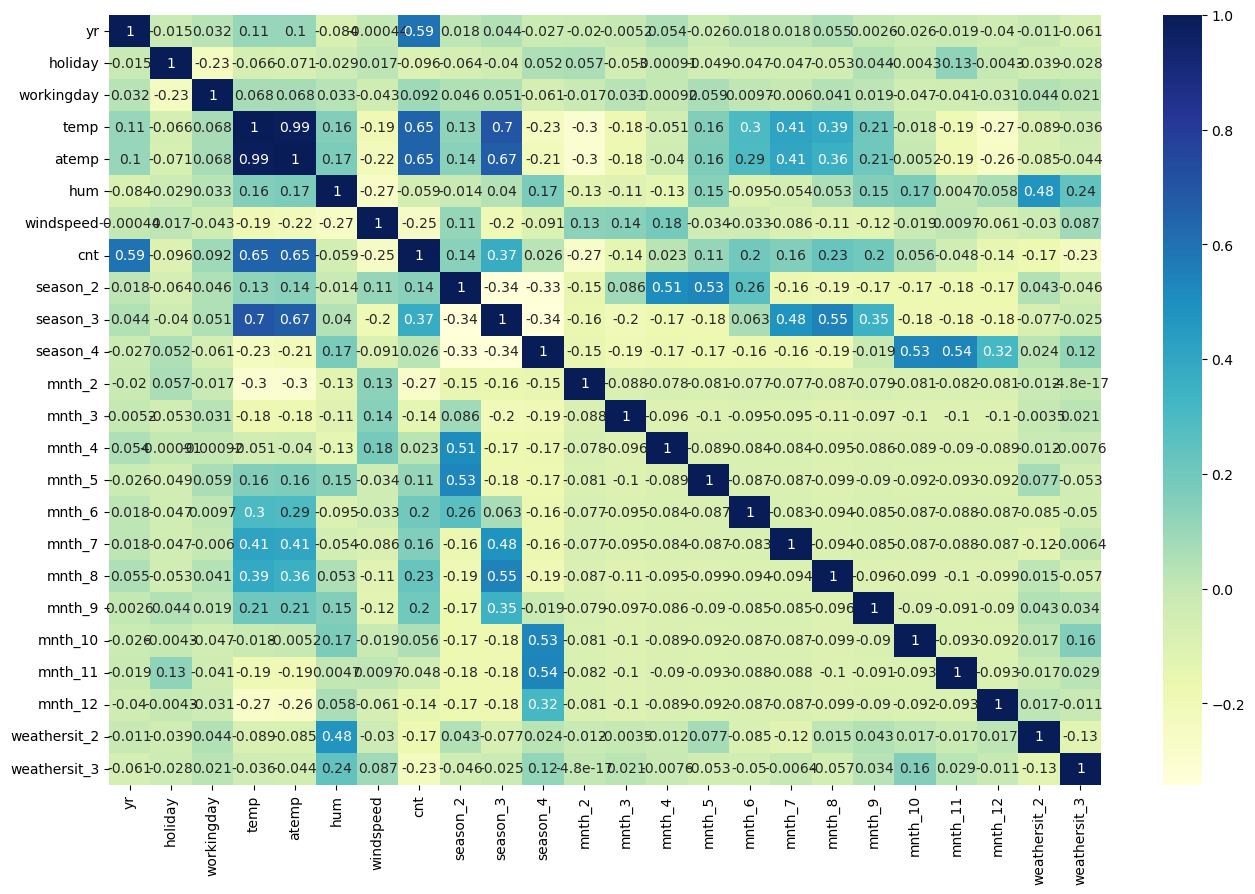

In [18]:
#heatmap
plt.figure(figsize= (16,10))
sns.heatmap(bs_train.corr(),annot=True ,cmap='YlGnBu')
plt.show()

In [19]:
bs_train.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
yr,1.000000,-0.014980,0.031808,0.108054,0.104971,-0.084061,-0.000439,0.591433,0.018294,0.044102,...,-0.025933,0.017623,0.017623,0.054774,0.002574,-0.025933,-0.018790,-0.040049,-0.011388,-6.076399e-02
holiday,-0.014980,1.000000,-0.233863,-0.066405,-0.070760,-0.029224,0.017458,-0.095948,-0.063798,-0.040017,...,-0.049076,-0.046539,-0.046539,-0.052728,0.043692,-0.004302,0.127543,-0.004302,-0.038895,-2.815377e-02
workingday,0.031808,-0.233863,1.000000,0.068326,0.068349,0.032525,-0.042704,0.092019,0.046302,0.050976,...,0.059006,0.009741,-0.006030,0.040575,0.019495,-0.046584,-0.041271,-0.031500,0.043563,2.115873e-02
temp,0.108054,-0.066405,0.068326,1.000000,0.989539,0.155252,-0.187281,0.645048,0.126057,0.697012,...,0.155168,0.301219,0.413678,0.387176,0.207212,-0.018286,-0.194994,-0.273091,-0.089452,-3.622709e-02
atemp,0.104971,-0.070760,0.068349,0.989539,1.000000,0.169341,-0.215108,0.647944,0.136550,0.669431,...,0.161665,0.293970,0.406832,0.359727,0.205900,-0.005162,-0.185918,-0.262072,-0.085086,-4.439780e-02
hum,-0.084061,-0.029224,0.032525,0.155252,0.169341,1.000000,-0.267126,-0.058793,-0.014192,0.039925,...,0.145409,-0.095077,-0.054070,0.052949,0.152439,0.167153,0.004676,0.057615,0.479436,2.449653e-01
windspeed,-0.000439,0.017458,-0.042704,-0.187281,-0.215108,-0.267126,1.000000,-0.253038,0.110441,-0.195088,...,-0.034342,-0.033103,-0.085671,-0.111460,-0.121930,-0.018546,0.009742,-0.061179,-0.029892,8.677832e-02
cnt,0.591433,-0.095948,0.092019,0.645048,0.647944,-0.058793,-0.253038,1.000000,0.140259,0.372210,...,0.113276,0.195411,0.158087,0.227578,0.201639,0.055558,-0.048002,-0.143546,-0.169715,-2.266784e-01
season_2,0.018294,-0.063798,0.046302,0.126057,0.136550,-0.014192,0.110441,0.140259,1.000000,-0.341962,...,0.529732,0.262846,-0.164832,-0.186753,-0.169366,-0.173818,-0.176016,-0.173818,0.043202,-4.590079e-02
season_3,0.044102,-0.040017,0.050976,0.697012,0.669431,0.039925,-0.195088,0.372210,-0.341962,1.000000,...,-0.181148,0.062915,0.482018,0.546121,0.347811,-0.181148,-0.183439,-0.181148,-0.077248,-2.481685e-02


In [20]:
#Define the target variable for training set
y_train=bs_train.pop('cnt')
X_train=bs_train

In [21]:
X_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

In [23]:
# add a constant

X_train_sm=sm.add_constant(X_train['atemp'])

#Train Model using OLS Regression

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()
lr_model.params


const    1431.848840
atemp    5950.404439
dtype: float64

In [24]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           4.77e-62
Time:                        22:33:34   Log-Likelihood:                -4448.0
No. Observations:                 510   AIC:                             8900.
Df Residuals:                     508   BIC:                             8909.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1431.8488    172.338      8.308      0.000    1093.265    1770.433
atemp       5950.4044    310.351     19.173      0.000    5340.674    6560.135
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
X_train_sm=X_train[['yr','temp','holiday', 'workingday', 'hum', 'windspeed','season_2', 'season_3', 
                    'season_4', 'mnth_3', 
        'mnth_8', 'mnth_9', 'mnth_10',
        'weathersit_2', 'weathersit_3']]
X_train_sm=sm.add_constant(X_train_sm)
#create first model

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          6.20e-189
Time:                        22:33:34   Log-Likelihood:                -4111.3
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1944.2885    241.779      8.042      0.000    1469.246    2419.331
yr            1994.0998     70.252     28.385      0.000    1856.071    2132.129
temp          4303.0401    294.858     14.594      0.000    3723.710    4882.370
holiday       -687.8349    227.056     -3.029      0.003   -1133.949    -241.721
workingday     142.2175     76.297      1.864      0.063      -7.688     292.123
hum          -1487.4559    326.733     -4.553      0.000   -2129.413    -845.499
windspeed    -1598.6552    222.834     -7.174      0.000   -2036.475   -1160.836
season_2      1061.4747    130.544      8.131      0.000     804.984    1317.965
season_3       314.6687    196.609      1.600      0.110     -71.625     700.963
season_4      1307.1697    122.006     10.714      0.000    1067.454    1546.885
mnth_3         237.2746    125.432      1.892      0.059      -9.171     483.720
mnth_8         435.4755    151.757      2.870      0.004     137.306     733.645
mnth_9        1039.8265    150.039      6.930      0.000     745.034    1334.619
mnth_10        350.1003    152.752      2.292      0.022      49.976     650.225
weathersit_2  -479.3509     90.753     -5.282      0.000    -657.661    -301.041
weathersit_3 -2144.0013    229.485     -9.343      0.000   -2594.889   -1693.114
==============================================================================
Omnibus:                       66.905   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.879
Skew:                          -0.666   Prob(JB):                     7.84e-38
Kurtosis:                       5.504   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#Checking the VIF to remove which VIF is more
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF'] =[variance_inflation_factor(X_train_sm.values ,i) for i in range(X_train_sm.shape[1])]
vif['VIF'] =round(vif['VIF'] , 2)
vif =vif.sort_values(by="VIF" ,ascending=False)
vif

,Features,VIF
0,const,49.09
8,season_3,6.29
2,temp,3.72
7,season_2,2.66
9,season_4,2.33
5,hum,1.90
11,mnth_8,1.68
14,weathersit_2,1.56
13,mnth_10,1.51
12,mnth_9,1.40


In [27]:
#Residual Analysis

y_train_pred=lr_model.predict(X_train_sm)

<Axes: ylabel='Density'>

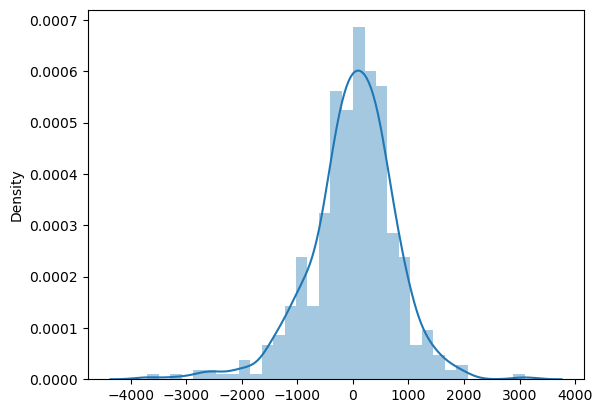

In [28]:
res=y_train-y_train_pred
sns.distplot(res)

In [29]:
##Scale variable in test dataset

num_vars =['temp','atemp','hum','windspeed']
bs_test[num_vars] = scaler.transform(bs_test[num_vars])

In [30]:
bs_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,4560.559091,0.263636,0.245455,...,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,1904.968544,0.441609,0.431338,...,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,5913.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
#Define Target variable
y_test=bs_test.pop('cnt')
X_test=bs_test

In [32]:
#add Constant

X_test_sm =sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,...,0,1,0,0,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,0,0,0,1,0,0,1,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,...,0,0,0,1,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,...,0,1,0,0,0,0,0,0,0,0


In [33]:

X_test_sm = X_test_sm[X_train_sm.columns]

In [34]:
X_test_sm

,const,yr,temp,holiday,workingday,hum,windspeed,season_2,season_3,season_4,mnth_3,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
184,1.0,0,0.831783,1,0,0.657364,0.084219,0,1,0,0,0,0,0,1,0
535,1.0,1,0.901354,0,1,0.610133,0.153728,1,0,0,0,0,0,0,0,0
299,1.0,0,0.511964,0,1,0.837699,0.334206,0,0,1,0,0,0,1,1,0
221,1.0,0,0.881625,0,1,0.437098,0.339570,0,1,0,0,1,0,0,0,0
152,1.0,0,0.817246,0,1,0.314298,0.537414,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0.519232,0,1,0.756118,0.283397,0,0,1,0,0,0,0,0,0
127,1.0,0,0.584649,0,0,0.650923,0.069510,1,0,0,0,0,0,0,0,0
640,1.0,1,0.745598,0,1,0.817947,0.052115,0,0,1,0,0,0,1,1,0
72,1.0,0,0.331557,0,1,0.512107,0.203418,0,0,0,1,0,0,0,0,0


In [35]:
y_test_pred = lr_model.predict(X_test_sm)

In [36]:
#Find out the R squared value between test and predicted test data sets
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8202383526753301

## Interepretation of results
The test Model has a value of 82%

Analysing the above model, the company should focus on the following features:
Company should focus on expanding business during Spring.
Company should focus on expanding business during September and october.
Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.